# Serie A - Differenziale xG


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

In [18]:
font_path = "assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")

## Leggere il dataframe

In [19]:
df = pd.read_csv('data/goals_minus_xg_players.csv', sep='\t')
df = df.sort_values(by='G-xG').reset_index(drop=True)
df


,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,team_id,Team,Rk
0,Kevin Lasagna,it ITA,"FW,MF",Hellas Verona,30-295,1992,17.5,1,52,11,...,0,0,6.0,6.0,0.12,-5.0,-5.0,9876,Hellas Verona,17
1,Krzysztof Piątek,pl POL,FW,Salernitana,27-335,1995,22.8,4,56,19,...,1,1,8.2,7.5,0.13,-4.2,-4.5,6480,Salernitana,16
2,Lorenzo Pellegrini,it ITA,MF,Roma,26-347,1996,27.3,4,59,16,...,2,3,7.4,5.0,0.09,-3.4,-3.0,8686,Roma,14
3,Gerard Deulofeu,es ESP,FW,Udinese,29-080,1994,13.5,2,44,12,...,0,0,5.1,5.1,0.11,-3.1,-3.1,8600,Udinese,15
4,Nemanja Radonjić,rs SRB,"MF,FW",Torino,27-106,1996,16.2,2,52,17,...,0,0,5.0,5.0,0.10,-3.0,-3.0,9804,Torino,13
5,Albin Ekdal,se SWE,MF,Spezia,33-308,1989,19.2,0,19,4,...,0,0,2.9,2.9,0.16,-2.9,-2.9,9881,Spezia,12
6,Tammy Abraham,eng ENG,FW,Roma,25-242,1997,24.1,8,62,28,...,0,0,10.8,10.8,0.17,-2.8,-2.8,8686,Roma,10
7,Francesco Caputo,it ITA,FW,Empoli,35-299,1987,19.0,5,40,15,...,2,2,7.5,5.9,0.16,-2.5,-2.9,8534,Empoli,11
8,Lautaro Martínez,arARG,FW,Inter,25-283,1997,28.0,21,124,51,...,1,2,18.1,16.5,0.14,2.9,3.5,8636,Inter,4
9,Felipe Anderson,brBRA,FW,Lazio,30-047,1993,31.9,9,41,23,...,0,0,6.0,6.0,0.15,3.0,3.0,8543,Lazio,9


## Visualizzazione

Bar chart orizzontale

<BarContainer object of 18 artists>

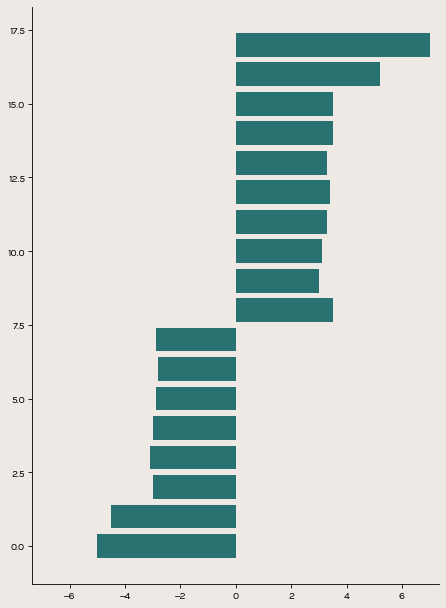

In [20]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['np:G-xG'].min()), df['np:G-xG'].max())
# Add 5% margin of that limit to the x-axis
max_ = max_*(1.05)
ax.set_xlim(-max_, max_)

ax.barh(df.index, df['np:G-xG'])

To make our viz more stylish, we perform the following steps:
* Rimuovo l'asse a lato.
* Aggiungo le gridlines.
* Linea in mezzo

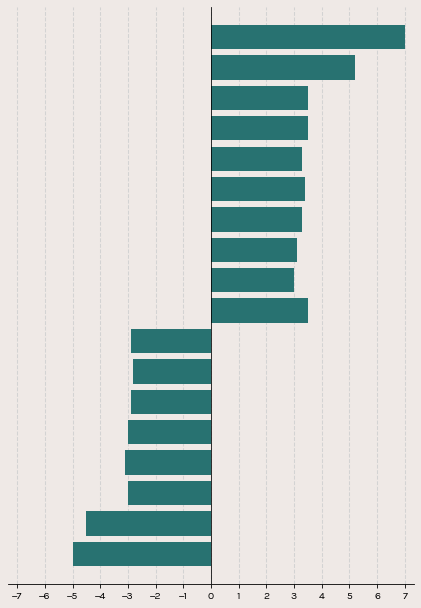

In [21]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['np:G-xG'].min()), df['np:G-xG'].max())
# Add 5% margin of that limit to the x-axis
max_ = max_*(1.05)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# -- Bar Chart -------------------------------------
ax.barh(
    df.index, df['np:G-xG'],
    #hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

Ora, scriviamo il differenziale xG nel barchart.

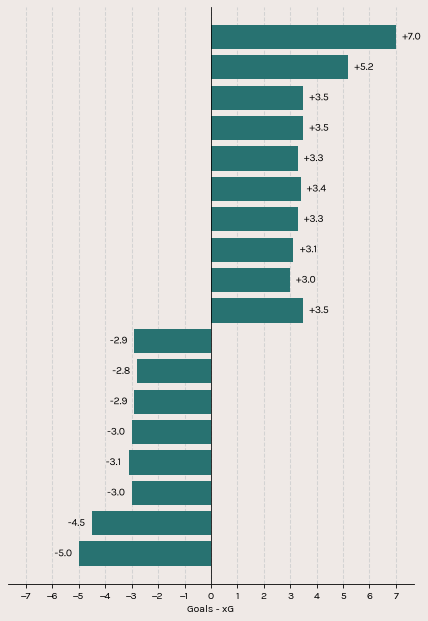

In [22]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['np:G-xG'].min()), df['np:G-xG'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Goals - xG', size=10)
# -- Bar Chart -------------------------------------
ax.barh(
    df.index, df['np:G-xG'],
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
for index, x in enumerate(df['np:G-xG']):
    if x < 0:
        sign_offset = -1
        sign_text = ''
    else:
        sign_offset = 1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

### Aggiungo i loghi

Aggiungo i loghi per estetica

In [23]:
# Codici dei loghi, inseriti nel CSV
team_logos = [
    8524, 9857, 7801, 8534,
    8535, 8636, 9885, 8543,
    9888, 8564, 6504, 9875,
    8686, 6480, 9882, 7943,
    9881, 9804, 8600, 9876
]

In [24]:
def add_logo_on_ax(ax, team_id, bw = False):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))

    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

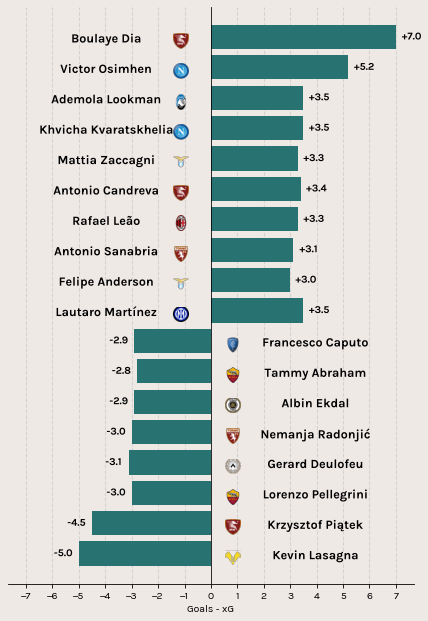

In [25]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['np:G-xG'].min()), df['np:G-xG'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Goals - xG', size=10)
# -- Bar Chart -------------------------------------
ax.barh(
    df.index, df['np:G-xG'],
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df['np:G-xG']):
    if x < 0:
        sign_offset = -1
        offset_logo = .55
        sign_text = ''
        offset_text = 4
    else:
        sign_offset = 1
        offset_logo = 1.45
        sign_text = '+'
        offset_text = -5
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points',
    )
    '''
    name = ax.annotate(
        xy=(x+5, index),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(-sign_offset*15,0),
        ha='center',
        va='center',
        textcoords='offset points'
    )
    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    '''
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team_id = df['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, False)

    name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.1),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='center',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )
    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

### Aggiungo un gradiente per le barre

In [26]:
'''
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]

'''
gradient = [
'#cb0000',
'#da2908',
'#d75609',
'#d88300',
'#d2a900',
'#cbc000',
'#899f84',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_19196\1963326333.py:43: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


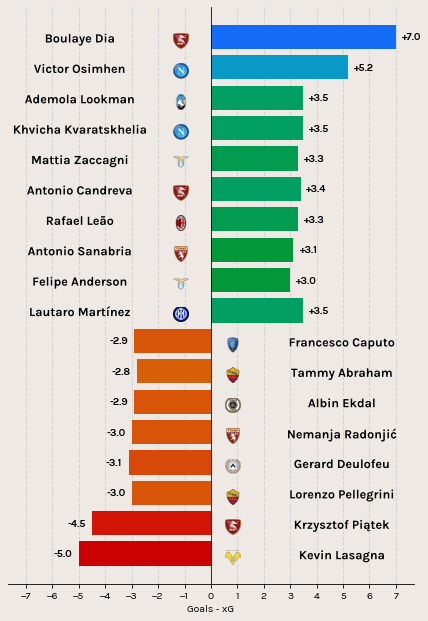

In [27]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['np:G-xG'].min()), df['np:G-xG'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Goals - xG', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df['np:G-xG'].min(),vmax=df['np:G-xG'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    df.index, df['np:G-xG'],
    color = cmap(norm(df['np:G-xG'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df['np:G-xG']):
    if x < 0:
        sign_offset = -1
        offset_logo = .55
        sign_text = ''
        offset_text = 5
    else:
        sign_offset = 1
        offset_logo = 1.45
        sign_text = '+'
        offset_text = -6
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points',
    )
    # -- Add the logo
    team_id = df['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)

    name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.1),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='center',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )
    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

### Aggiustamenti finali

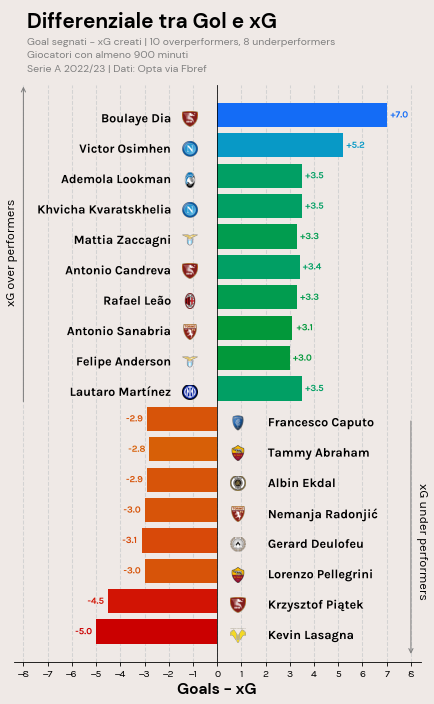

In [28]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
plt.rcParams['hatch.linewidth'] = 0.35
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['np:G-xG'].min()), df['np:G-xG'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.2)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Goals - xG', fontsize = 15, color = "black", font = "DM Sans", weight = "bold")
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df['np:G-xG'].min(),vmax=df['np:G-xG'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    df.index, df['np:G-xG'],
    color = cmap(norm(df['np:G-xG'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df['np:G-xG']):
    if x < 0:
        sign_offset = -1
        offset_logo = .55
        sign_text = ''
        offset_text = 2.2
    else:
        sign_offset = 1
        offset_logo = 1.45
        sign_text = '+'
        offset_text = -3
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.1f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team_id = df['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)

    if x < 0:
        name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.16),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='left',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )
    else:
        name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.16),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='right',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )

    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

# -- Figure title and arrows --------------------------------
position_negative = df[df['np:G-xG'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='xG over performers',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='xG under performers',
    rotation=-90,
    xytext=(10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

fig_text(
    x = 0.15, y = .95, 
    s = 'Differenziale tra Gol e xG',
    va = 'bottom', ha = 'left',
    fontsize = 20, color = 'black', fontname="DM Sans", weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.895, 
    s = 'Goal segnati - xG creati | 10 overperformers, 8 underperformers\nGiocatori con almeno 900 minuti\nSerie A 2022/23 | Dati: Opta via Fbref',
    va = 'bottom', ha = 'left',
    fontsize = 10, font = 'DM Sans', color = 'gray'
)

plt.savefig(
	"figures/SerieA_Players_xG_Differential.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_Players_xG_Differential_tr.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)